In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns

# Imports, Load CSV


In [159]:
df1 = pd.read_csv('capstonewrangled.csv', index_col=0, low_memory=False)
warnings.filterwarnings('ignore')

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
df1.columns.to_list()

['Accident_Index',
 '1st_Road_Class',
 '1st_Road_Number',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Accident_Severity',
 'Carriageway_Hazards',
 'Date',
 'Day_of_Week',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Junction_Control',
 'Junction_Detail',
 'Latitude',
 'Light_Conditions',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 'Longitude',
 'Number_of_Casualties',
 'Number_of_Vehicles',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Police_Force',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Speed_limit',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'Year_x',
 'InScotland',
 'Age_Band_of_Driver',
 'Age_of_Vehicle',
 'Driver_Home_Area_Type',
 'Driver_IMD_Decile',
 'Engine_Capacity_.CC.',
 'Hit_Object_in_Carriageway',
 'Hit_Object_off_Carriageway',
 'Journey_Purpose_of_Driver',
 'Junction_Location',
 'make',
 'model',
 'Propulsion_Code',
 'Sex_of_Driver',
 'Skidding_and_Overturning',
 '

# Feature Selection

There are certain categories that are not able be used as predictors/features for the purpose of this project. For this project, I am attempting to look at variable/features that are available prior to the accident, and thus could be predictive of the future severity of new accidents. While the dataset contains tons of valuable information on location as well, the purpose is to not use the future generated model to generalize by location either, so all variables that have location, or are a proxy for location, will be removed. 

In [47]:
#list of features to be removed and reasoning

ls = ['Did_Police_Officer_Attend_Scene_of_Accident',#Post incident
      'Number_of_Casualties',#A possible other target variable, but at this time not being investigate.Post-incident variable
      'Hit_Object_in_Carriageway',#Post incident
      'Hit_Object_off_Carriageway',#Post incident
      'Skidding_and_Overturning',#Post incident
      'X1st_Point_of_Impact',#Post incident
      'Carriageway_Hazards',#Post incident
      'Police_Force',#Location based
      "InScotland",#Location based
      'Local_Authority_(District)',#Location based
      'Local_Authority_(Highway)',#Location based
      'Driver_Home_Area_Type',#rural or urban etc. Location based
      "Driver_IMD_Decile",#location based - a calculated score
      'Number_of_Vehicles',#Post incident
      'Year_x',#duplicate year from Merge
      '1st_Road_Number',#irrelevant - location based
      '2nd_Road_Number', #irrelevant - location based
      'Latitude', #location based
      'Longitude',#location based
      "Year_y",#duplicate found in date
      'Urban_or_Rural_Area'#location based
     ]

In [5]:
#drop all of the above columns
df = df1.drop(ls, axis=1)

In [46]:
#Select at numeric features and run pairplot to explore
numdf = df.select_dtypes(include=['float64', 'int64'])
numdf.head(3)

,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Age_of_Vehicle,Engine_Capacity_.CC.,Vehicle_Location.Restricted_Lane,Vehicle_Reference
0,0.0,5.0,30.0,3.0,8268.0,0.0,1
1,0.0,0.0,30.0,5.0,8300.0,0.0,1
2,0.0,0.0,30.0,4.0,1769.0,0.0,1


Distributions of Numerical Features


array([[<AxesSubplot:title={'center':'Pedestrian_Crossing-Human_Control'}>,
        <AxesSubplot:title={'center':'Pedestrian_Crossing-Physical_Facilities'}>,
        <AxesSubplot:title={'center':'Speed_limit'}>],
       [<AxesSubplot:title={'center':'Age_of_Vehicle'}>,
        <AxesSubplot:title={'center':'Engine_Capacity_.CC.'}>,
        <AxesSubplot:title={'center':'Vehicle_Location.Restricted_Lane'}>],
       [<AxesSubplot:title={'center':'Vehicle_Reference'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

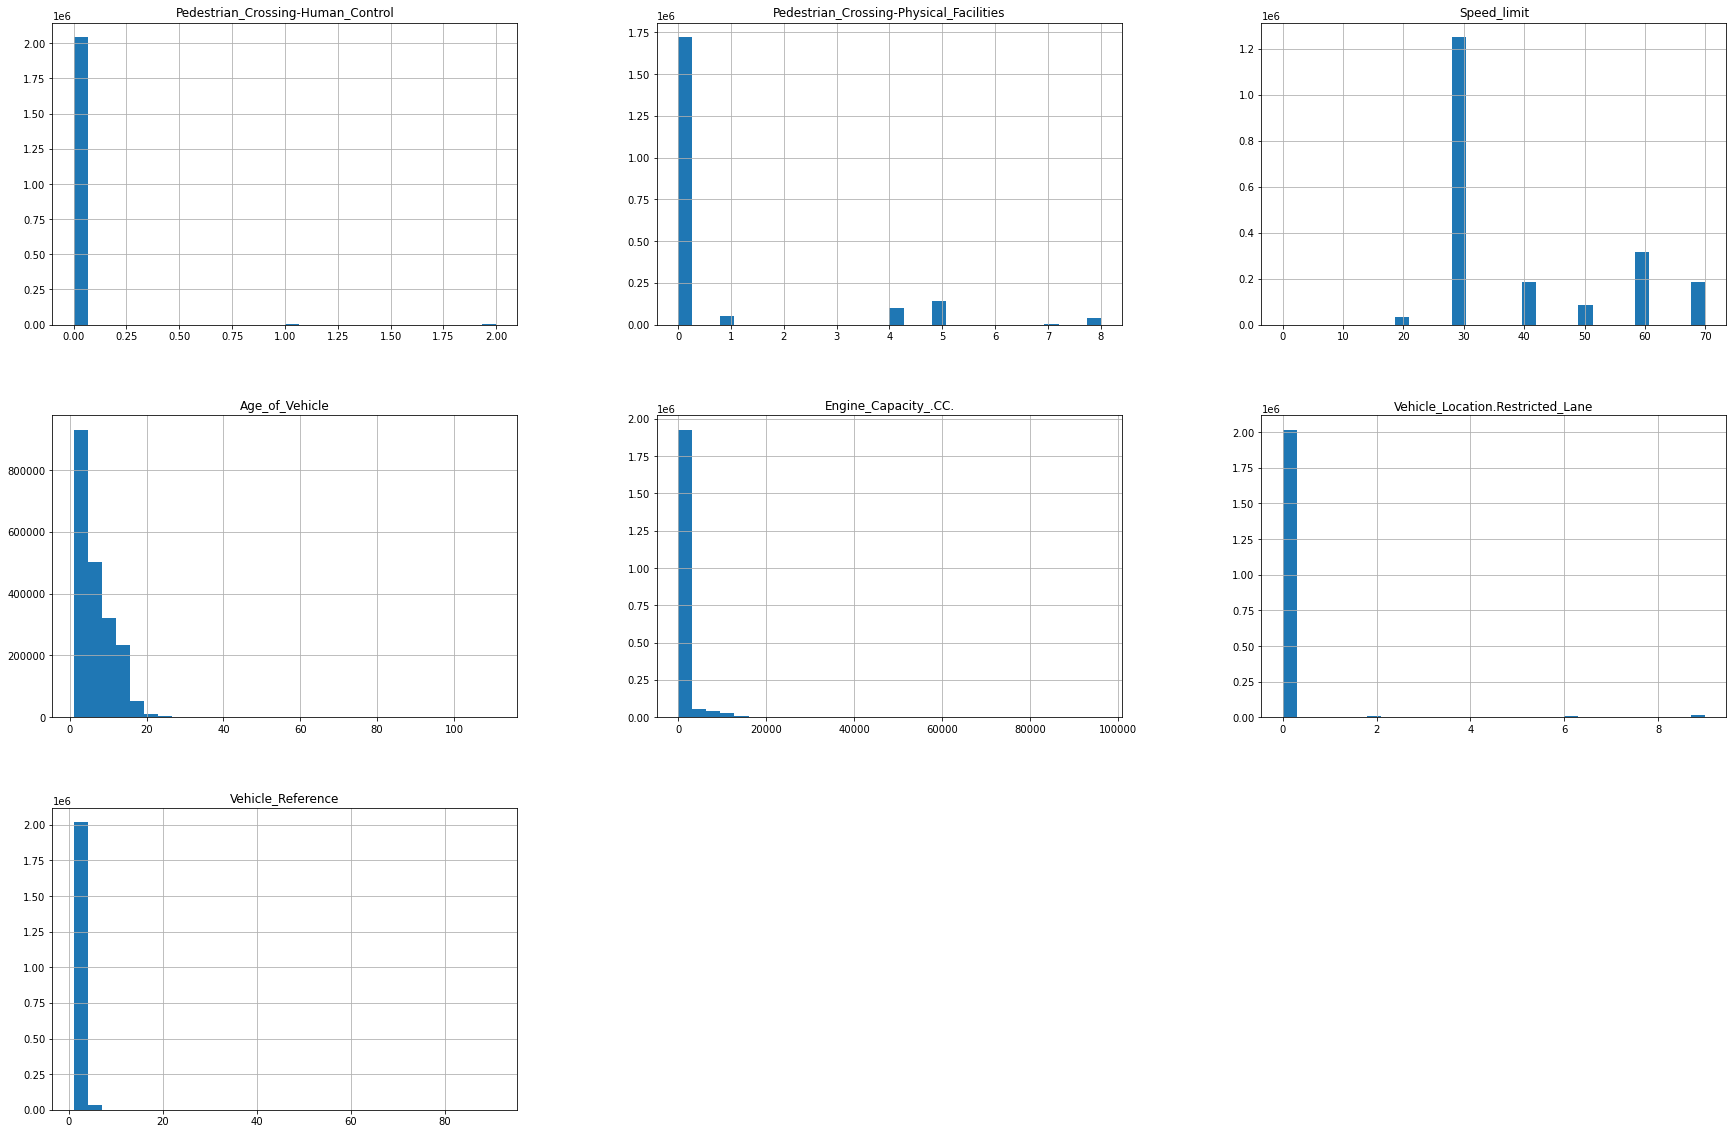

In [48]:
#Basic plots of Numerical Features
numdf.hist(bins=30, figsize =(30,20))

Looking at Categorical Features

In [43]:
#Select Categorial Columns
catdf = df.select_dtypes(include=['object'])

In [44]:
catlist =  catdf.columns.to_list()
catlist

['Accident_Index',
 '1st_Road_Class',
 'Accident_Severity',
 'Date',
 'Day_of_Week',
 'Junction_Control',
 'Junction_Detail',
 'Light_Conditions',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Time',
 'Weather_Conditions',
 'Age_Band_of_Driver',
 'Journey_Purpose_of_Driver',
 'Junction_Location',
 'make',
 'model',
 'Propulsion_Code',
 'Sex_of_Driver',
 'Towing_and_Articulation',
 'Vehicle_Leaving_Carriageway',
 'Vehicle_Manoeuvre',
 'Vehicle_Type',
 'Was_Vehicle_Left_Hand_Drive']

# Subset by Target Categories

In [61]:
#Subset by each category + [Slight, Serious, Fatal]

sli = df[df['Accident_Severity'] == 'Slight']
ser = df[df['Accident_Severity'] == 'Serious']
fat = df[df['Accident_Severity'] == 'Fatal']

In [50]:
#Create Datetime Column from Date and Time columns
df['Datetime'] = df.Date +" "+ df.Time
df['Datetime'] = pd.to_datetime(df.Datetime, infer_datetime_format=True)

# Define Seborn Catplot Functions

In [173]:
def lookcat(cat, df=df, height=7, aspect=2.5, rot=0, font=1, hue_order=['Fatal', 'Serious', 'Slight'],palette=sns.color_palette(['r','y','b'])):
    grouped2 = df.groupby(['Accident_Severity',cat]).size().reset_index(name="Count")
    sns.set(font_scale = font)
    g= sns.catplot(x=cat,
            y='Count',
            data=grouped2,
            hue='Accident_Severity',
            kind='bar',
            height=7,
            aspect = 2.5,
            hue_order=['Fatal', 'Serious', 'Slight'],
            palette=sns.color_palette(['r','y','b']))
    plt.xticks(rotation=rot)
    g.fig.suptitle('Accident Frequency by {}'.format(cat))

In [175]:
def invlookcat(cat, df=df, height=7, aspect=2.5, rot=90, font = 1, order=['Fatal', 'Serious', 'Slight'],palette=sns.color_palette(['r','y','b'])):
    grouped2 = df.groupby(['Accident_Severity',cat]).size().reset_index(name="Count")
    sns.set(font_scale = font)
    g= sns.catplot(x='Count',
            y=cat,
            data=grouped2,
            hue='Accident_Severity',
            kind='bar',
            height=7,
            aspect = 2.5,
            hue_order=['Fatal', 'Serious', 'Slight'],
            palette=sns.color_palette(['r','y','b']))
    plt.xticks(rotation=rot)
    g.fig.suptitle('Accident Frequency by {}'.format(cat))

# Time Series Exploration

Text(0.5, 0.98, 'Severity Explored by Hour of Day')

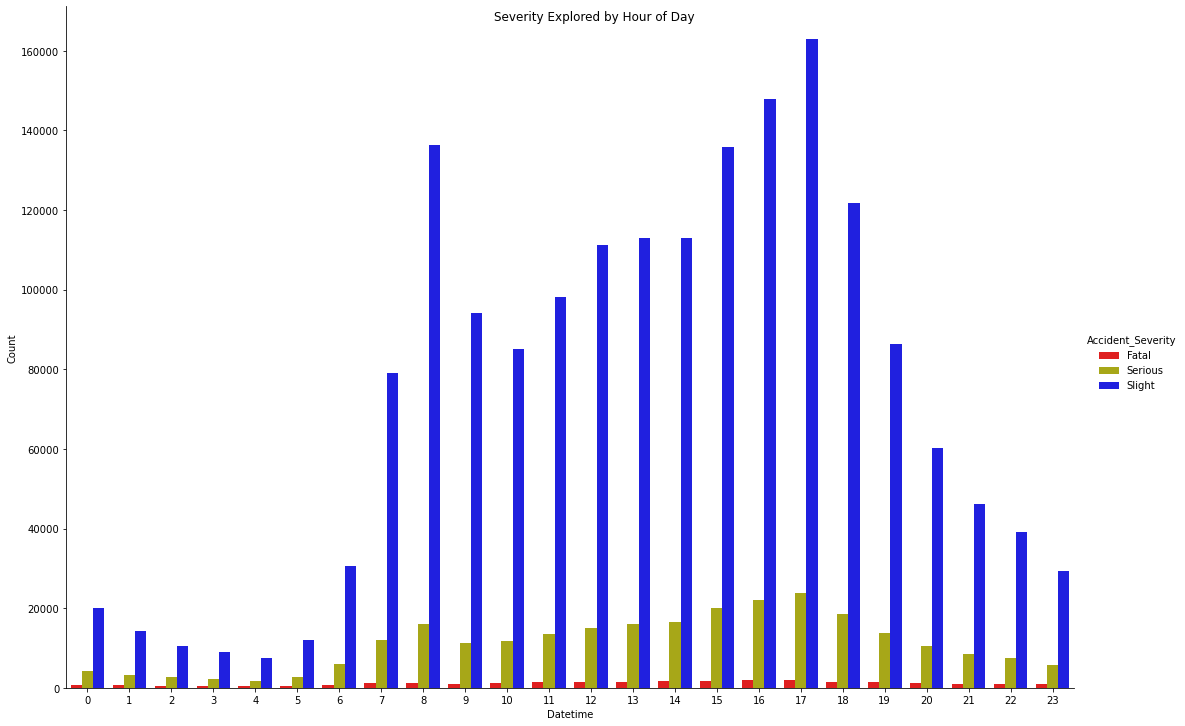

In [15]:
grouped2 = df.groupby(['Accident_Severity', df.Datetime.dt.hour]).size().reset_index(name="Count")
g= sns.catplot(x='Datetime',
            y='Count',
            data=grouped2,
            hue='Accident_Severity',
            kind='bar',
            height=10,
            aspect = 1.5,
            hue_order=['Fatal', 'Serious', 'Slight'],
            palette=sns.color_palette(['r','y','b']))
g.fig.suptitle('Severity Explored by Hour of Day')

In [51]:
serfat = df[ser].append(df[fat])
serfat.head(2)

,Accident_Index,1st_Road_Class,Accident_Severity,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,...,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,Datetime
18,200501BS00022,A,Serious,2005-01-08,Saturday,Give way or uncontrolled,T or staggered junction,Darkness - lights lit,0.0,0.0,...,Petrol,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,2005-01-08 03:00:00
39,200501BS70029,B,Serious,2005-02-15,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lights lit,0.0,1.0,...,Petrol,Male,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle over 500cc,No,2005-02-15 18:15:00


Text(0.5, 0.98, 'Serious/Fatal Explored by Hour of Day')

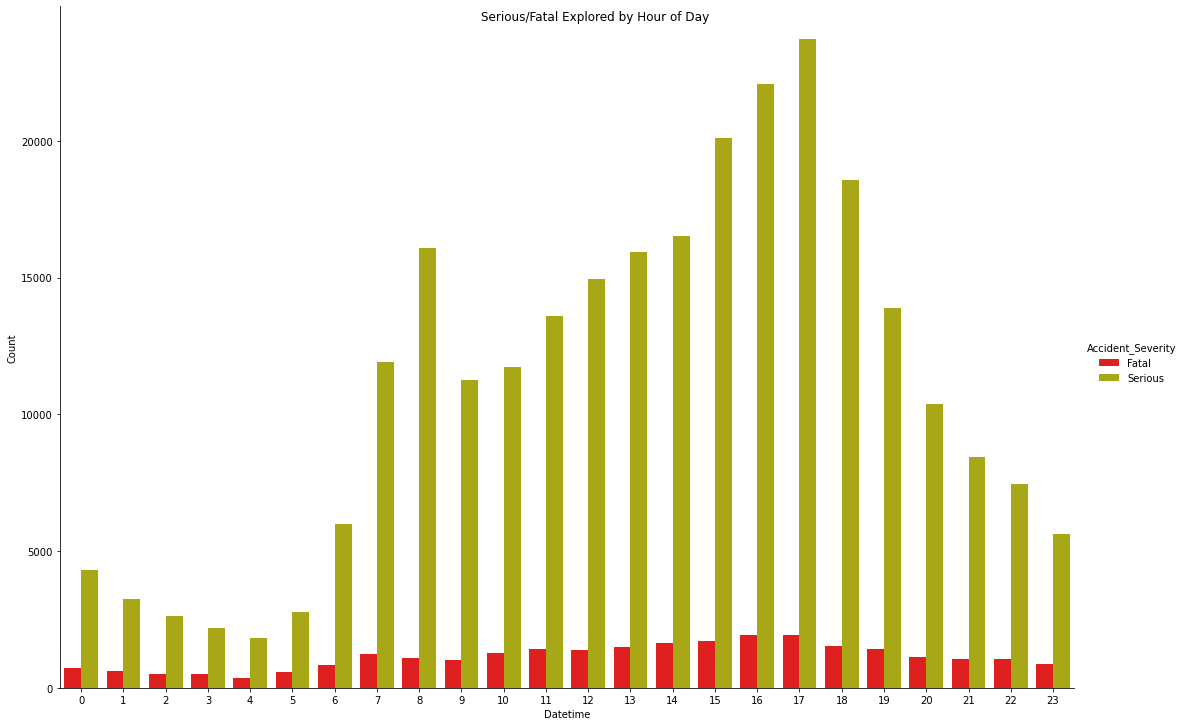

In [54]:
grouped2 = serfat.groupby(['Accident_Severity', df.Datetime.dt.hour]).size().reset_index(name="Count")
g= sns.catplot(x='Datetime',
            y='Count',
            data=grouped2,
            hue='Accident_Severity',
            kind='bar',
            height=10,
            aspect = 1.5,
            hue_order=['Fatal', 'Serious'],
            palette=sns.color_palette(['r','y','b']))
g.fig.suptitle('Serious/Fatal Explored by Hour of Day')


Text(0.5, 0.98, 'Severity Explored by Month of Year')

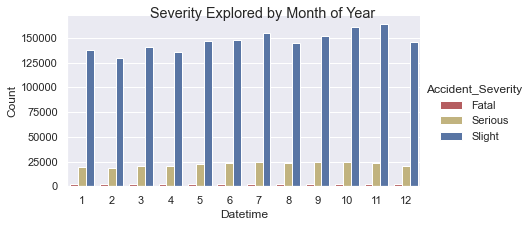

In [195]:
grouped2 = df.groupby(['Accident_Severity', df.Datetime.dt.month]).size().reset_index(name="Count")
g= sns.catplot(x='Datetime',
            y='Count',
            data=grouped2,
            hue='Accident_Severity',
            kind='bar',
            height=3,
            aspect = 2,
            hue_order=['Fatal', 'Serious', 'Slight'],
            palette=sns.color_palette(['r','y','b'])
              )
g.fig.suptitle('Severity Explored by Month of Year')

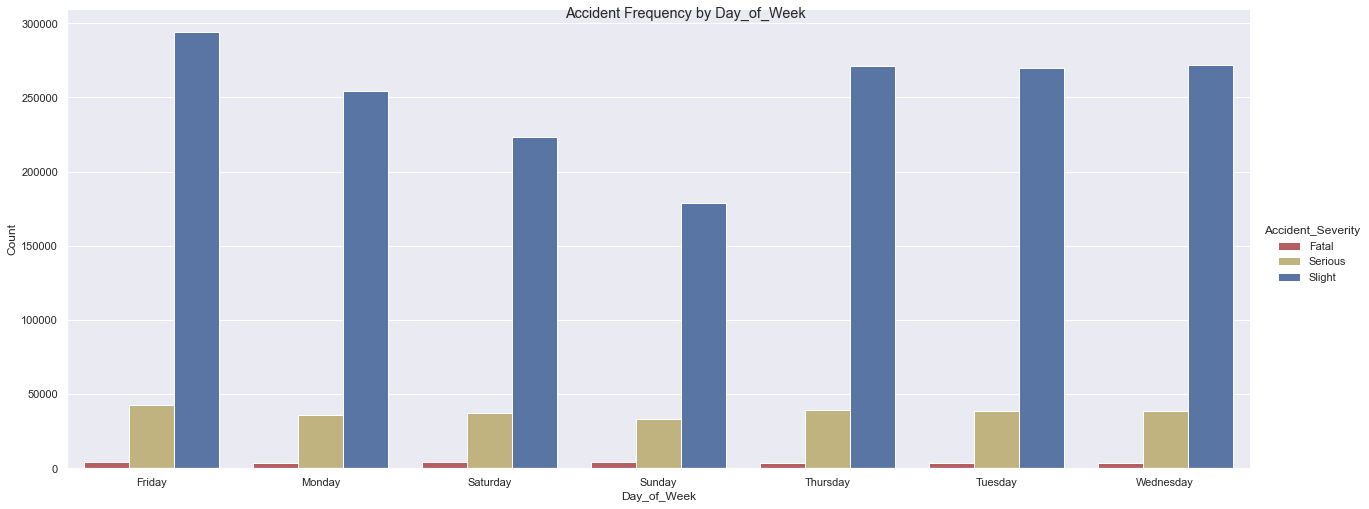

In [177]:
lookcat('Day_of_Week')

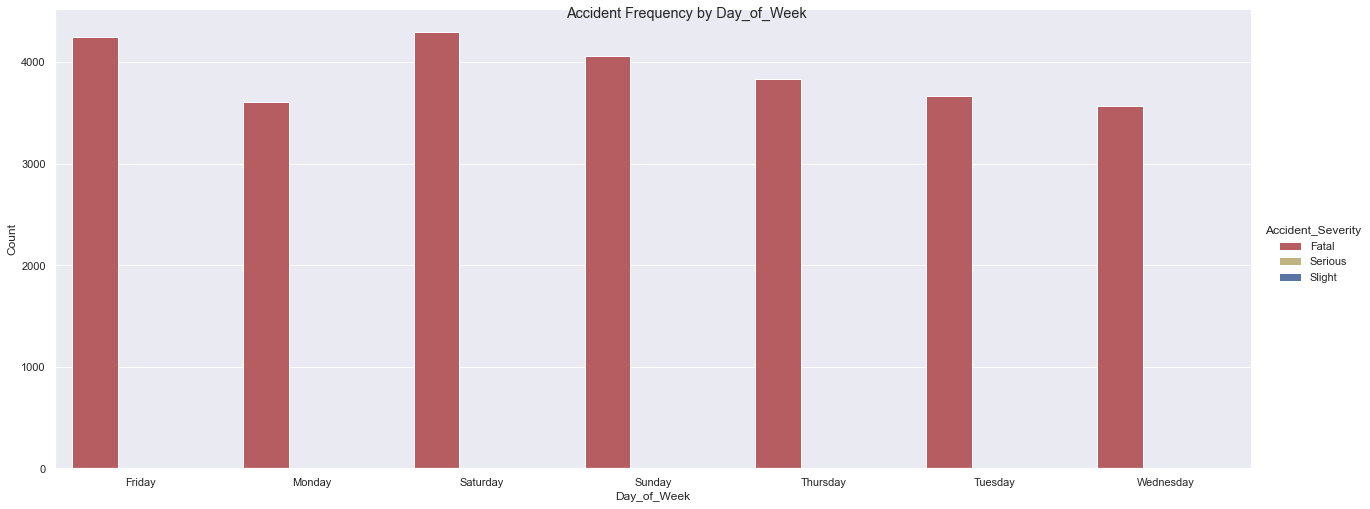

In [179]:
lookcat('Day_of_Week', df=fat)

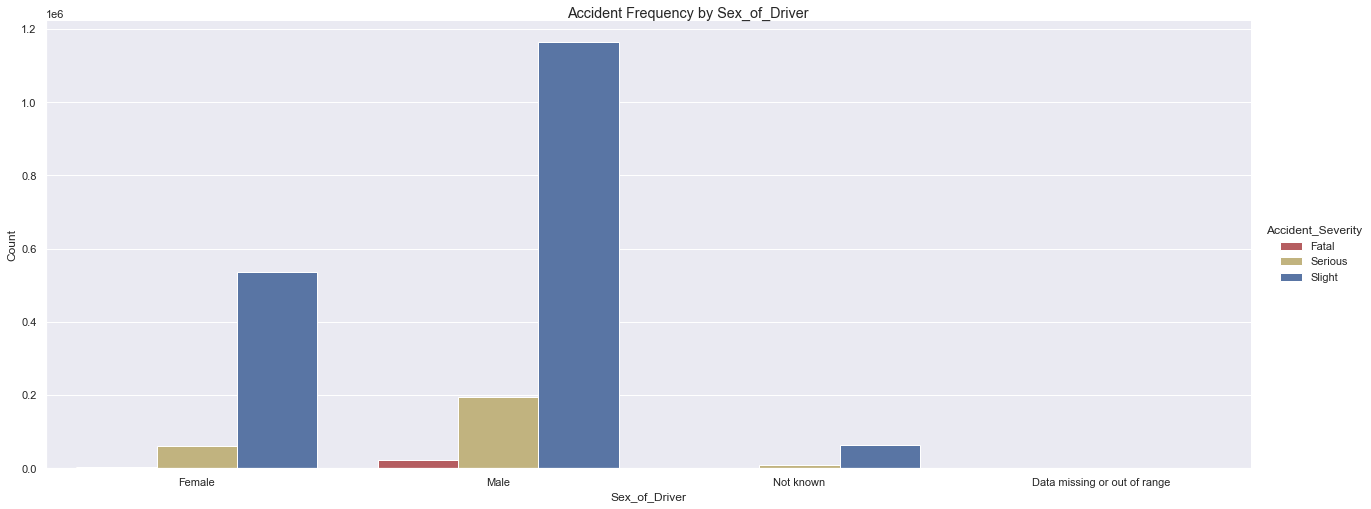

In [180]:

lookcat("Sex_of_Driver")

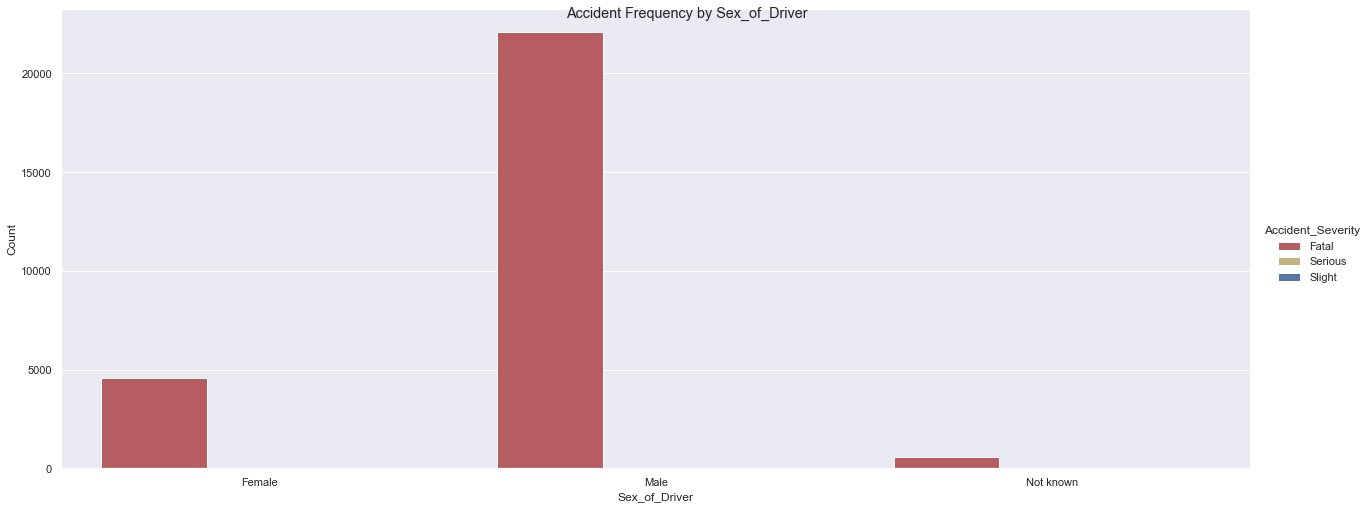

In [181]:
lookcat("Sex_of_Driver",df=fat)

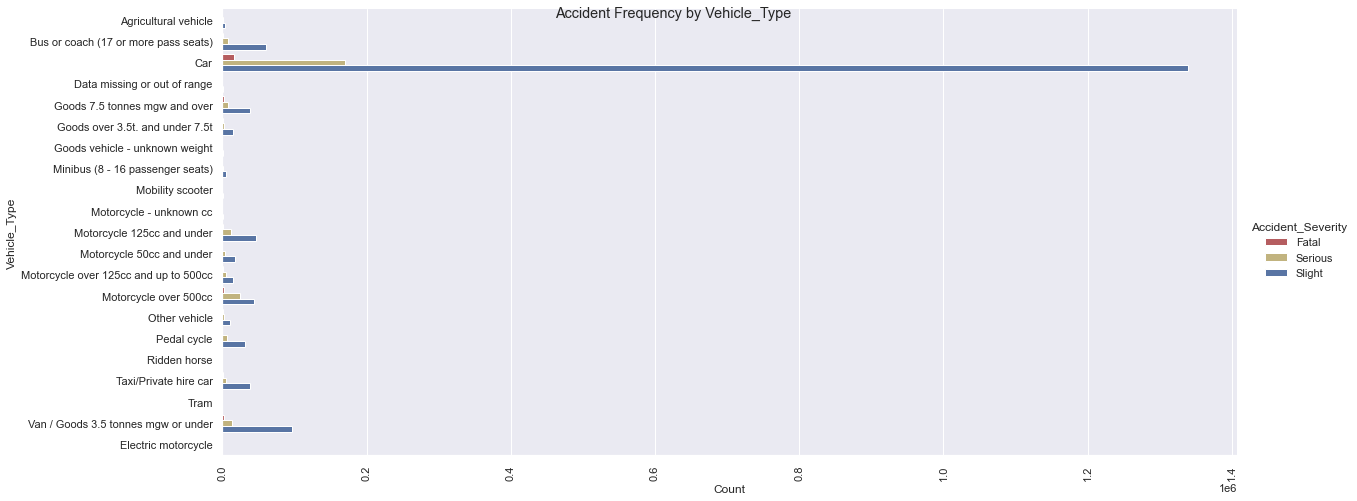

In [182]:
invlookcat('Vehicle_Type')

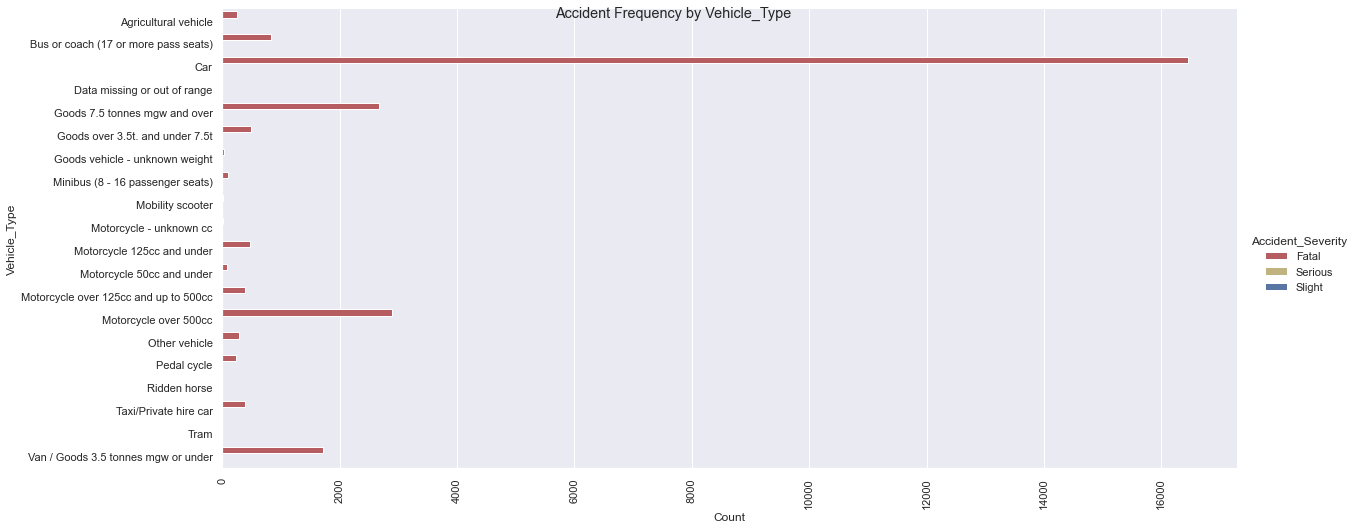

In [183]:
invlookcat('Vehicle_Type', df=fat)

In [189]:
lookcat(
 '2nd_Road_Class', df=df)

KeyError: '2nd_Road_Class'

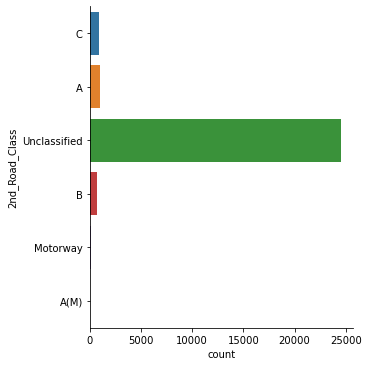

In [70]:
sns.catplot(y='2nd_Road_Class', data=fatalsubset, kind='count')


This shows 2nd_Road_Class to be not a greate predictor, and I will drop it. 

In [40]:
df.drop(columns = ['2nd_Road_Class'],inplace=True)

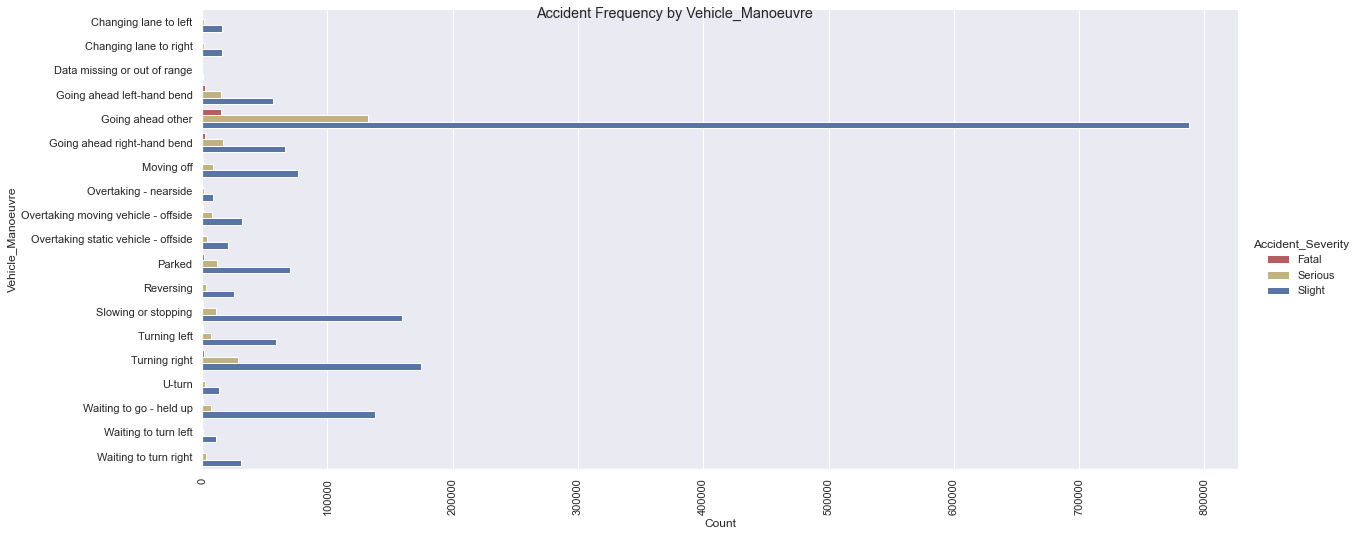

In [191]:
invlookcat('Vehicle_Manoeuvre',df=df)

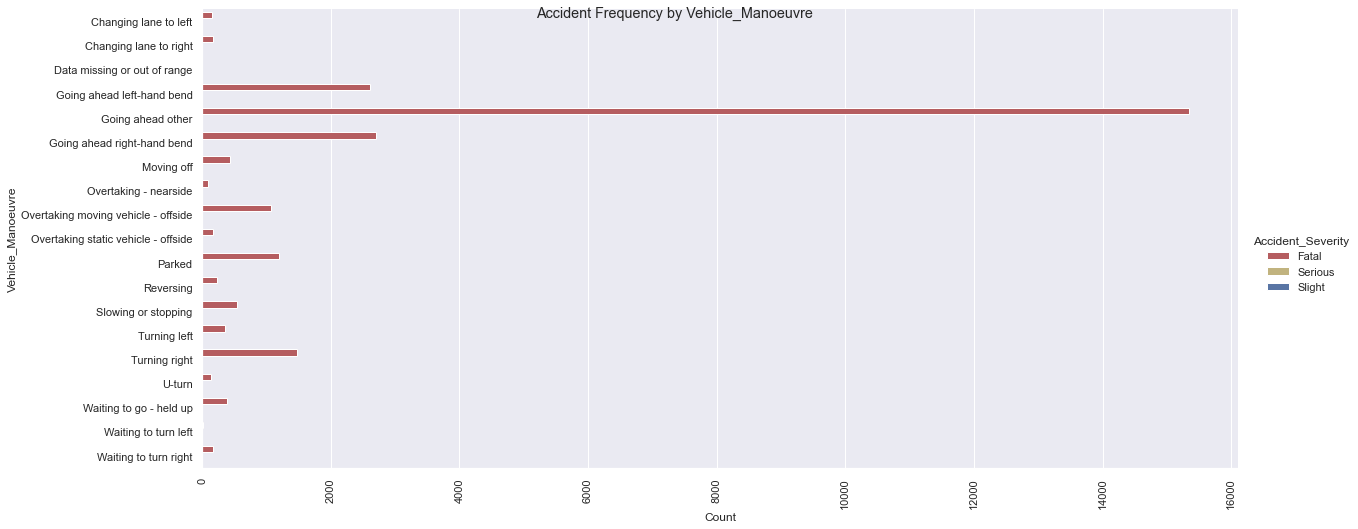

In [193]:
invlookcat('Vehicle_Manoeuvre',df=fat)

Text(0.5, 0.98, 'Severity Explored by Month of Year')

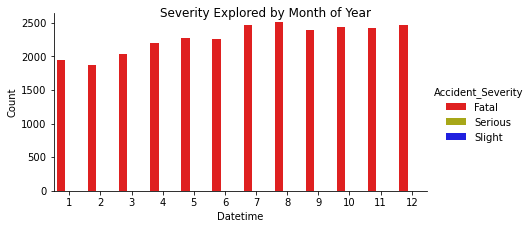

In [82]:
grouped2 = fat.groupby(['Accident_Severity', df.Datetime.dt.month]).size().reset_index(name="Count")
g= sns.catplot(x='Datetime',
            y='Count',
            data=grouped2,
            hue='Accident_Severity',
            kind='bar',
            height=3,
            aspect = 2,
            hue_order=['Fatal', 'Serious', 'Slight'],
            palette=sns.color_palette(['r','y','b'])
              )
g.fig.suptitle('Severity Explored by Month of Year')

In [28]:
dflist = df.columns.to_list()

# Severity By Numeric Features

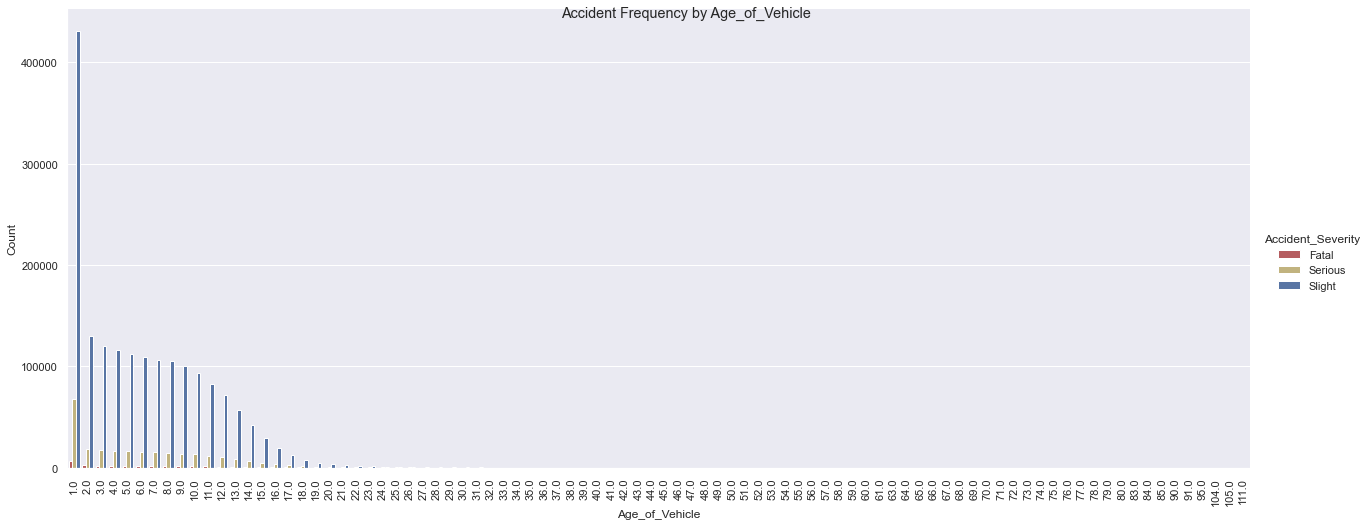

In [197]:
lookcat('Age_of_Vehicle', df=df, rot=90)

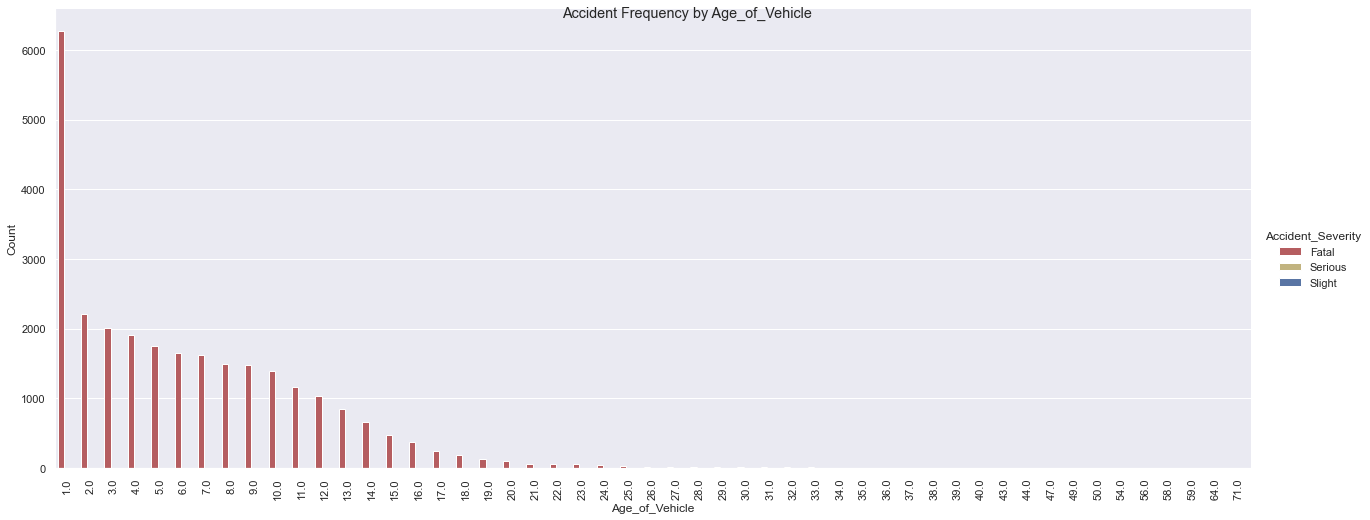

In [198]:
lookcat('Age_of_Vehicle', df=fat, rot=90)

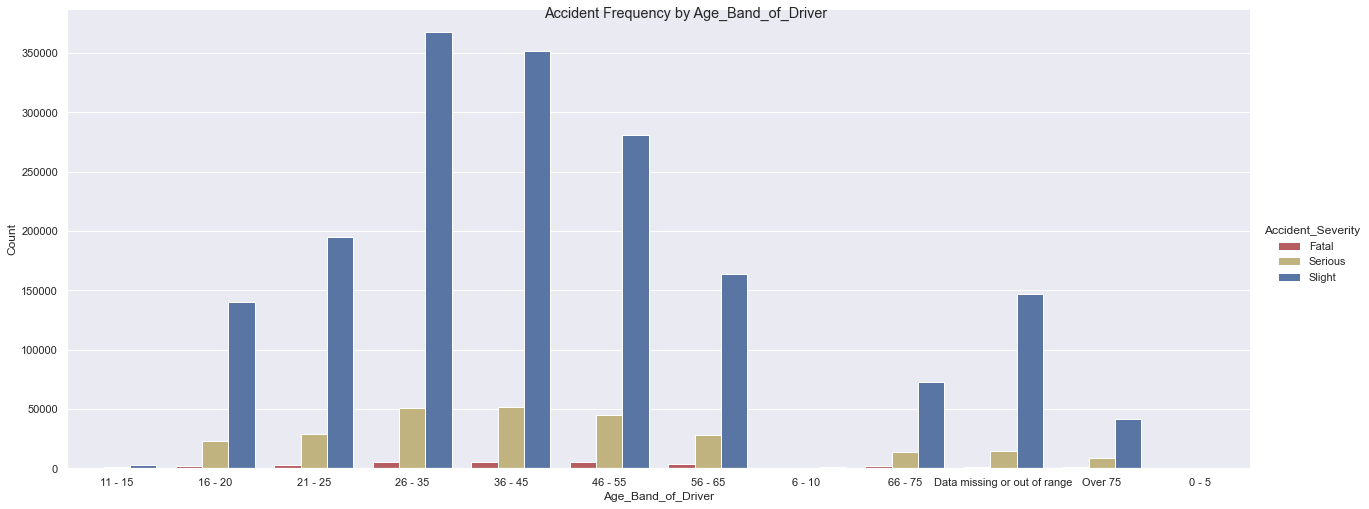

In [199]:
lookcat('Age_Band_of_Driver', df=df)

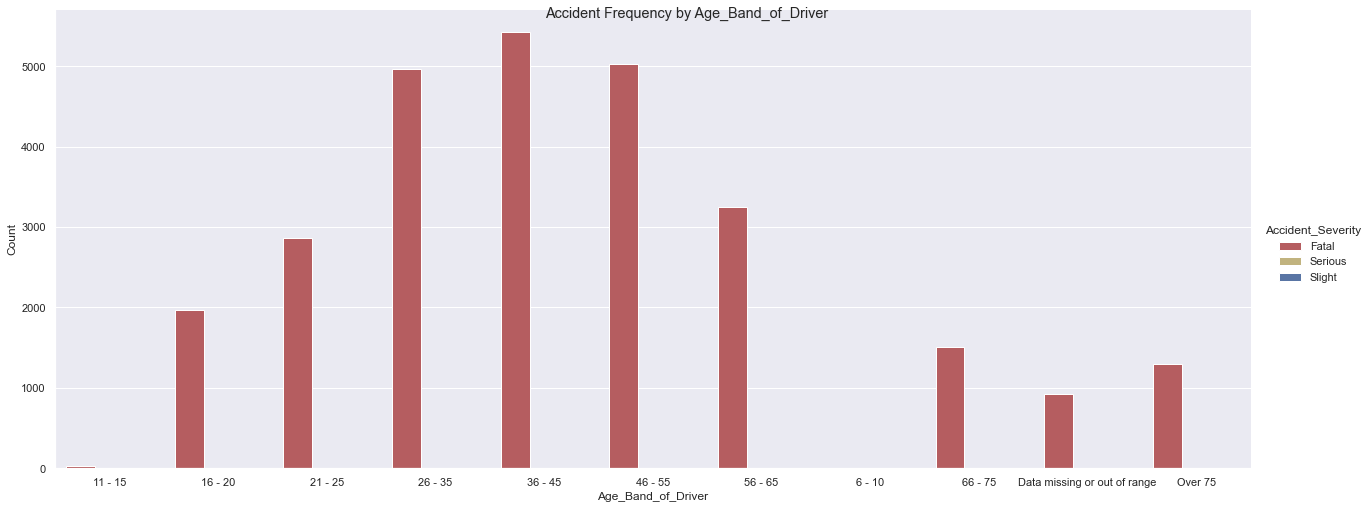

In [200]:
lookcat('Age_Band_of_Driver', df=fat)

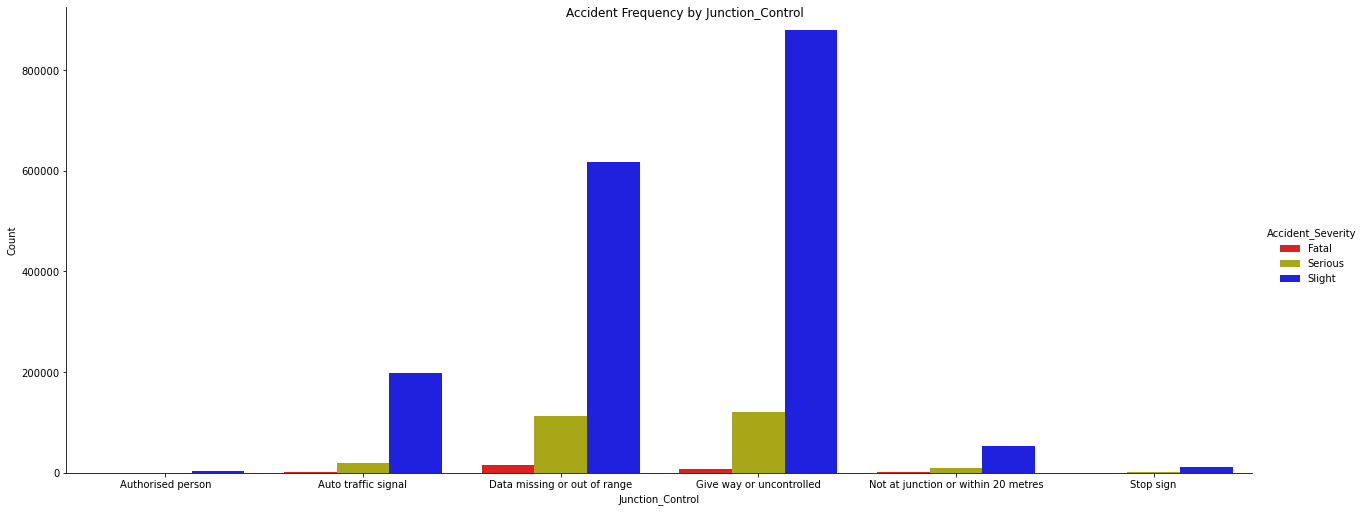

In [114]:
lookcat(catlist[5], df)
    

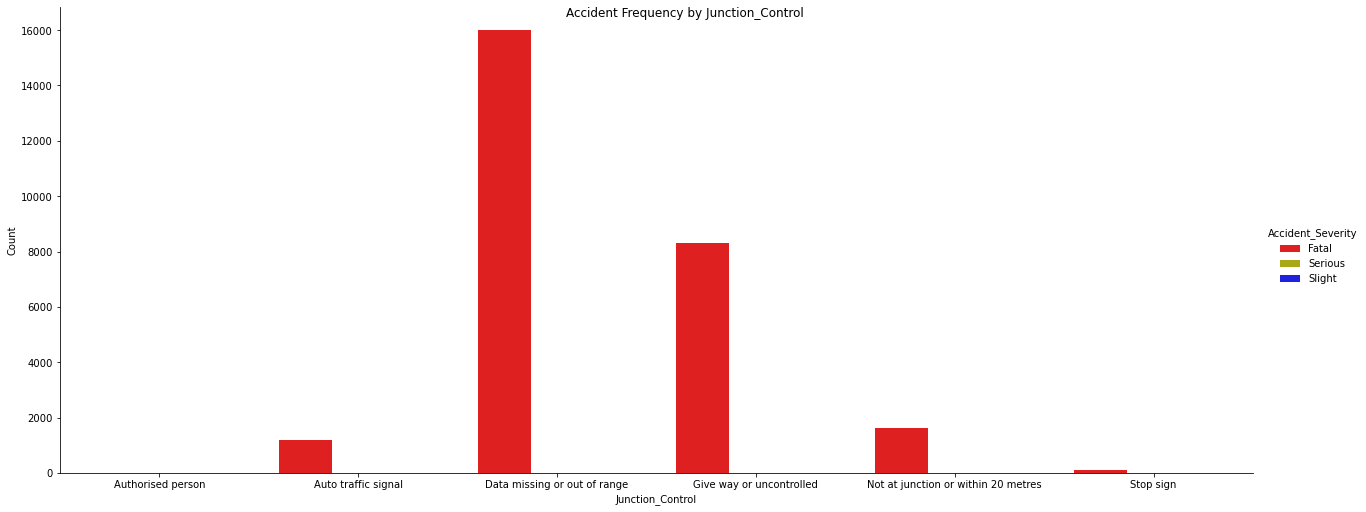

In [115]:
lookcat(catlist[5],fat)

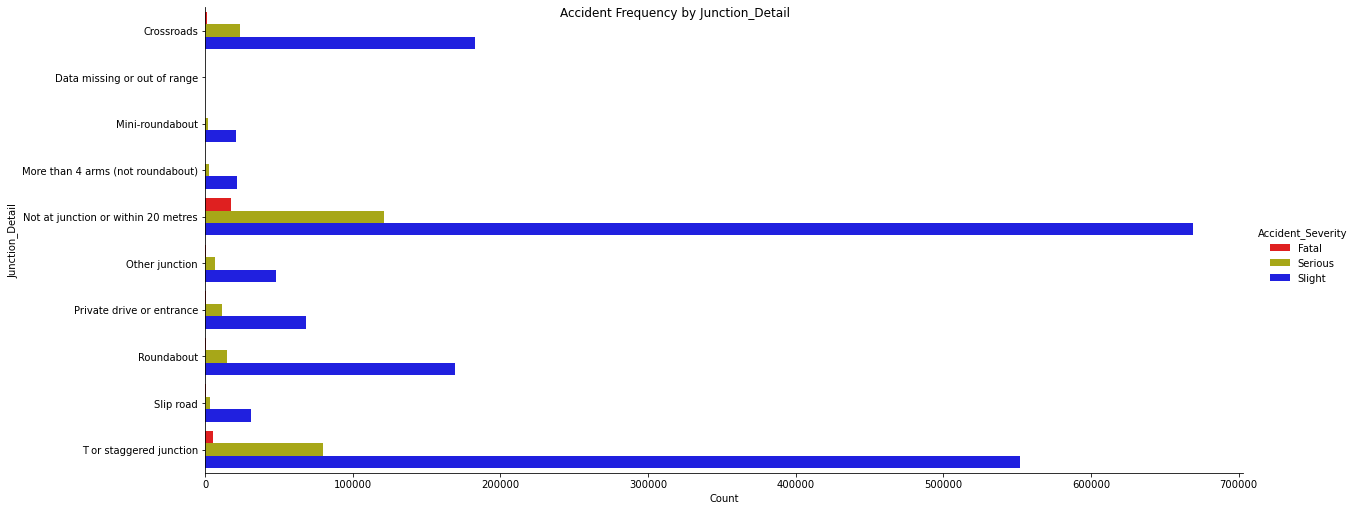

In [139]:
invlookcat(catlist[6],df)

In [170]:
lookcat(catlist[7],df, font=1 rot =45)

SyntaxError: invalid syntax (<ipython-input-170-08da1c51a44c>, line 1)

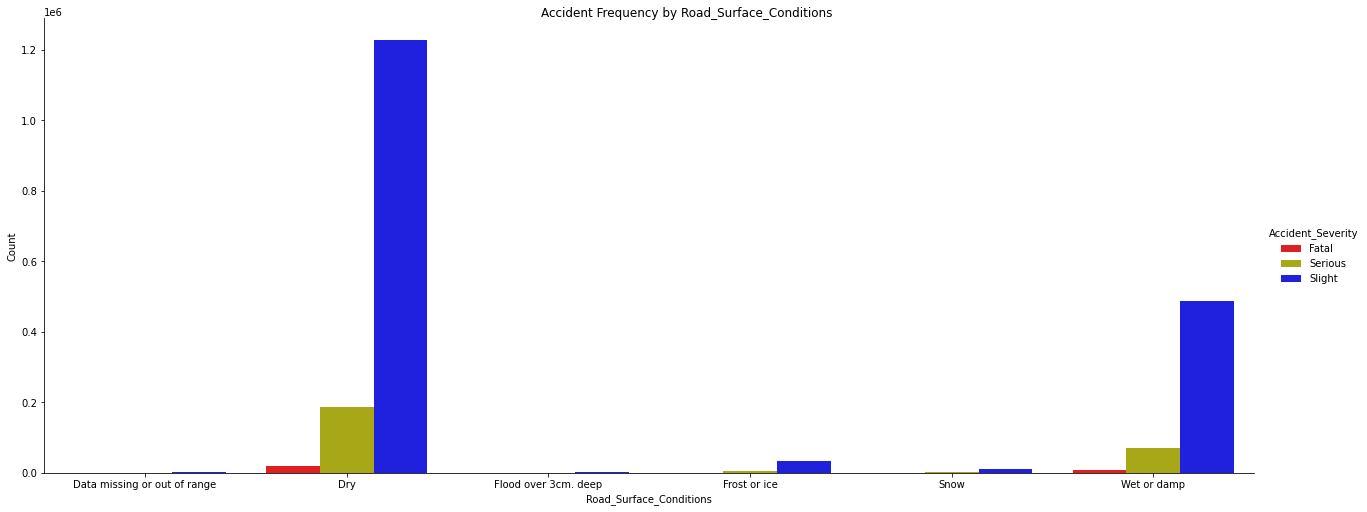

In [120]:
lookcat(catlist[8],df)

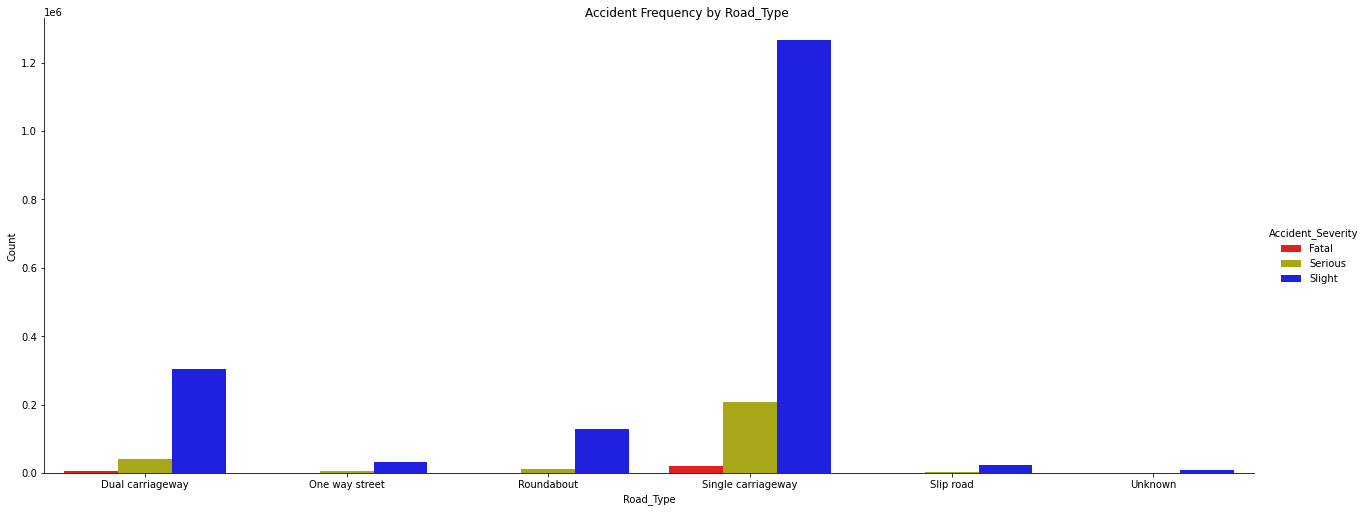

In [121]:
lookcat(catlist[9],df)

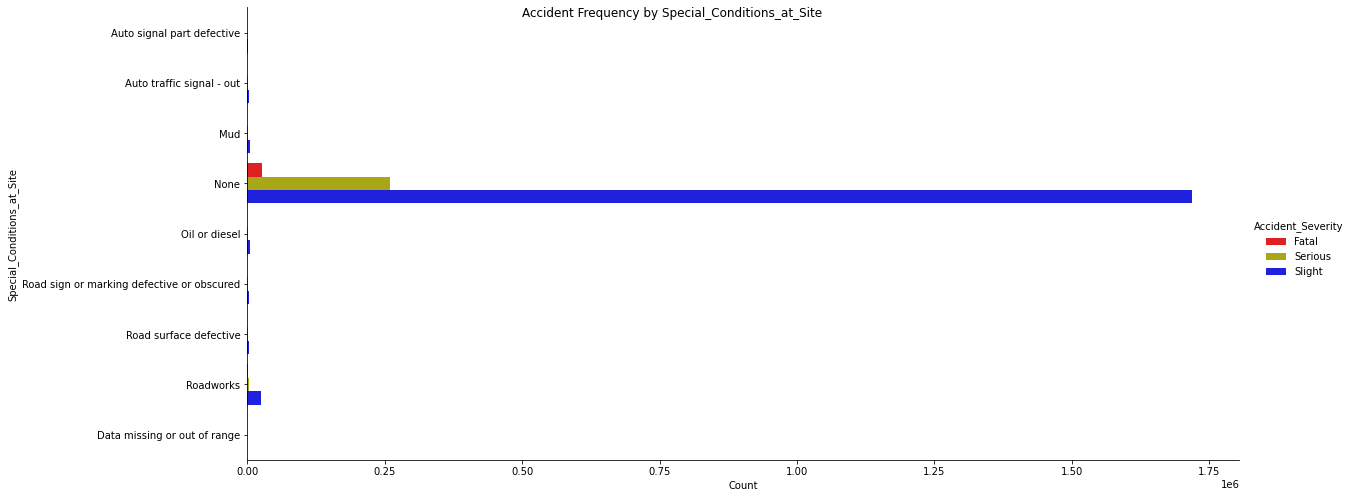

In [141]:
invlookcat(catlist[10],df)

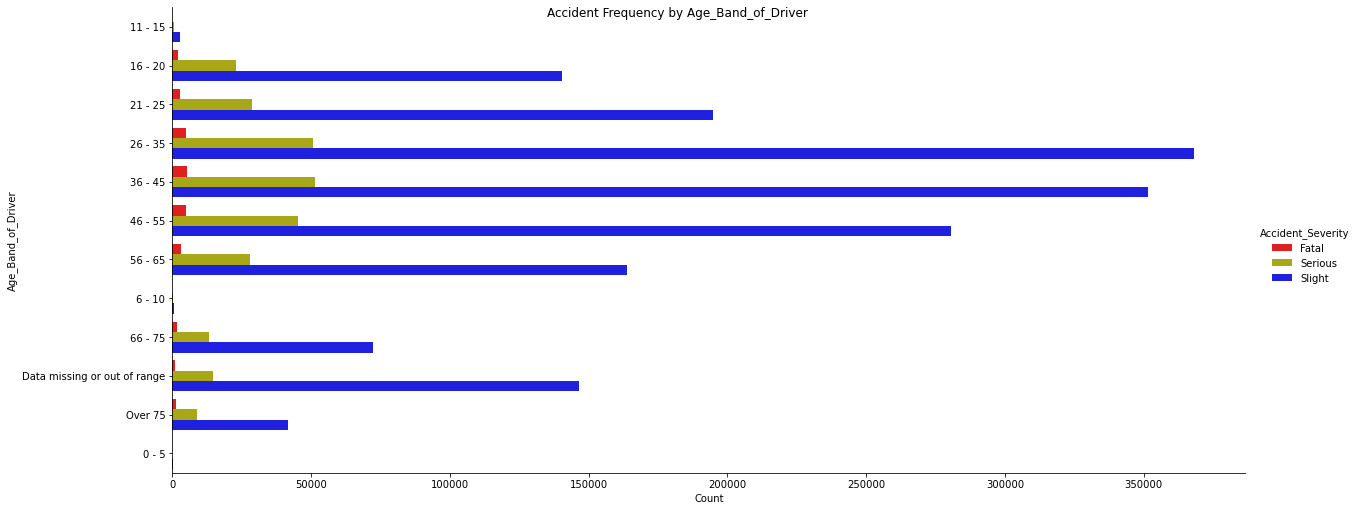

In [143]:
invlookcat(catlist[13],df)

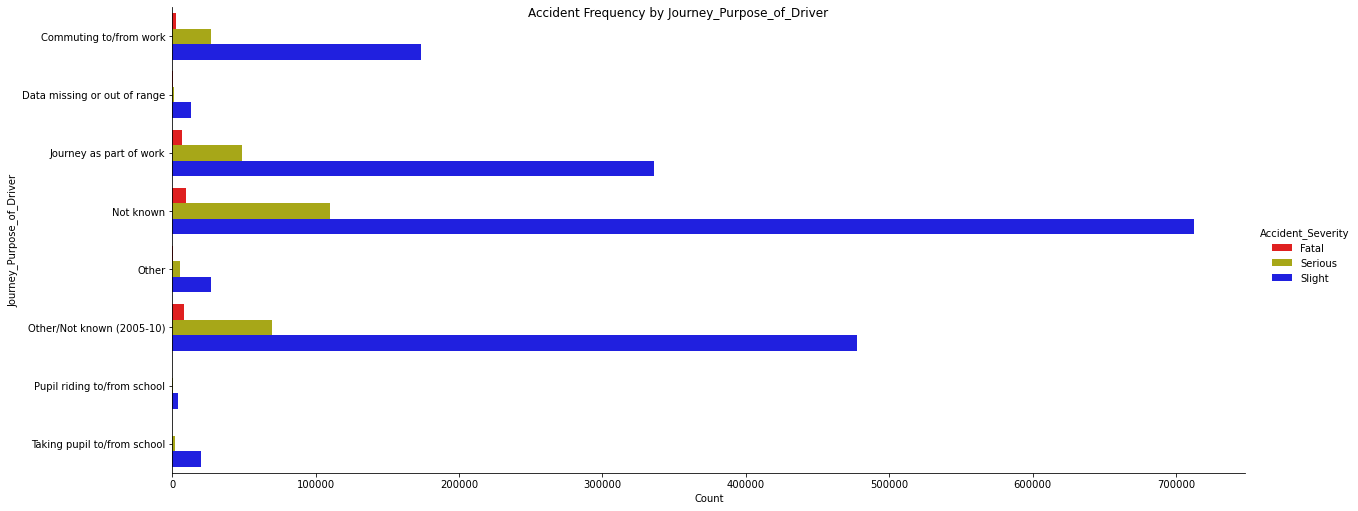

In [144]:
invlookcat(catlist[14],df)

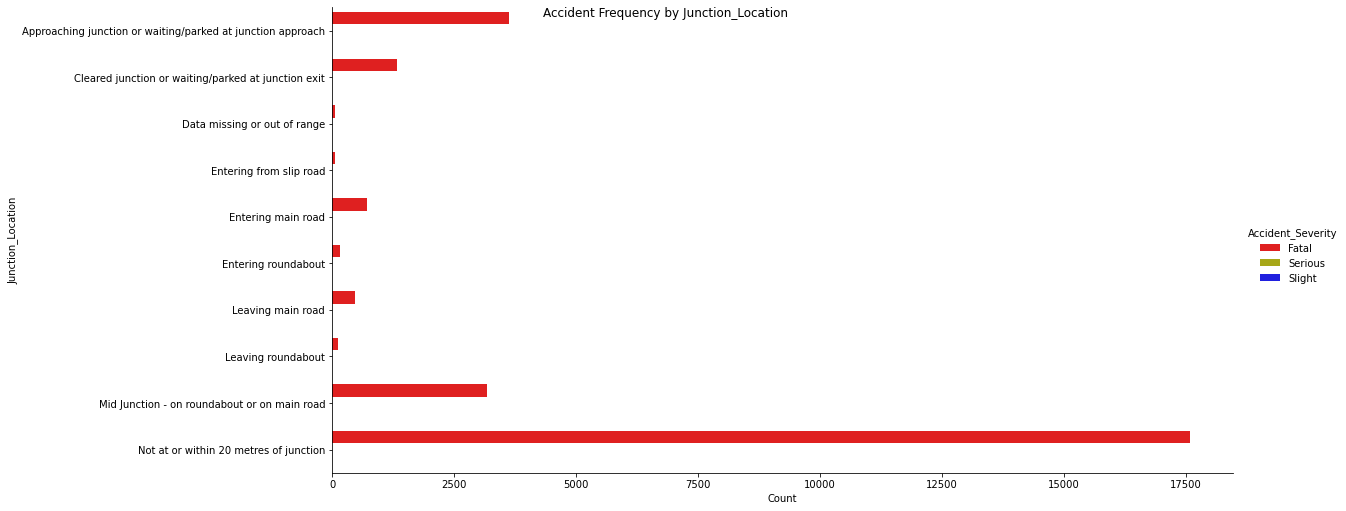

In [146]:
invlookcat(catlist[15],fat)

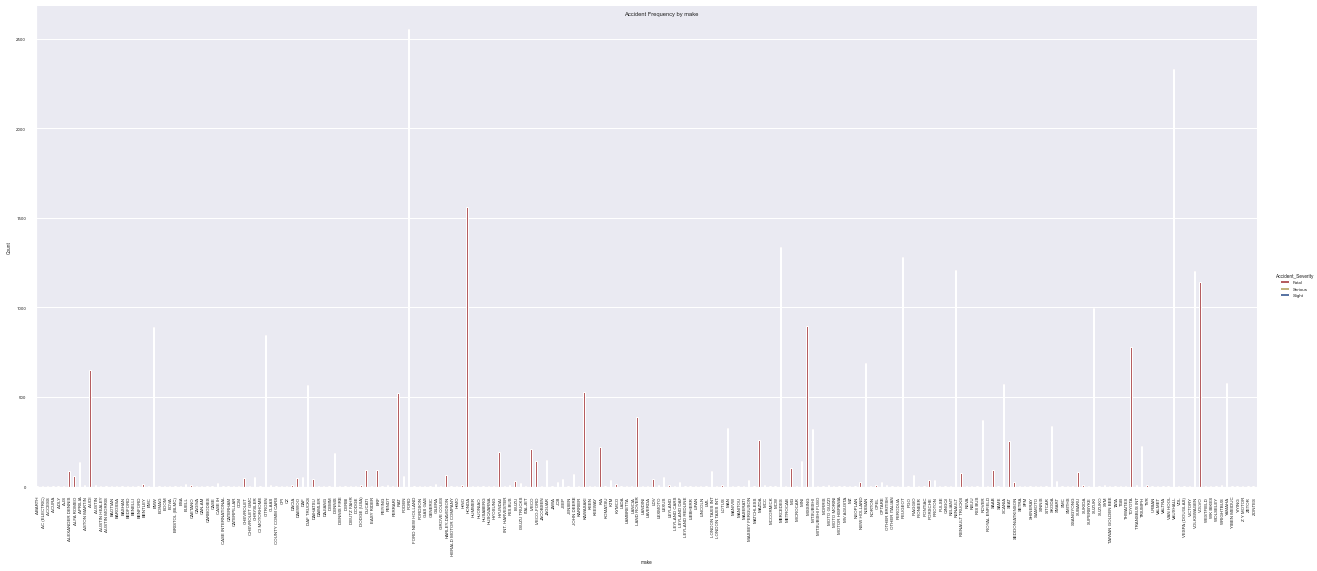

In [172]:
#make
lookcat(catlist[16],fat, height=20, aspect=2, rot=90, font=.4)

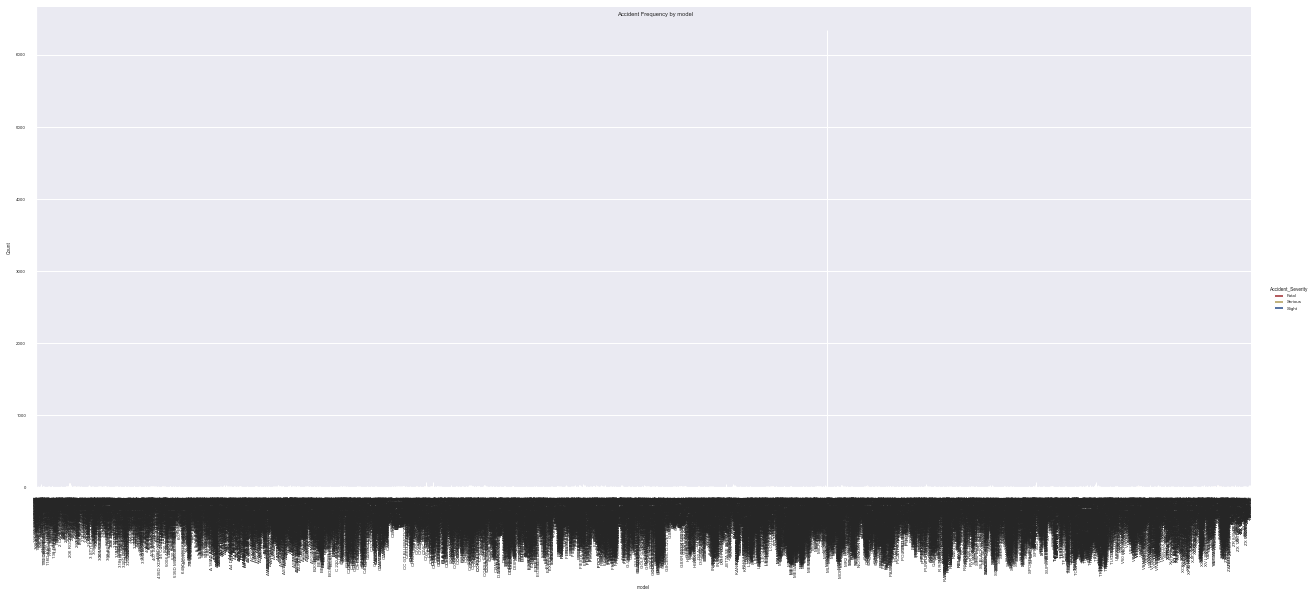

In [169]:

#model
lookcat(catlist[17],fat, height=50, aspect=.1, rot=90, font=.4)